In [1]:
#############
# LIBRARIES #
#############

from get_strava_data import my_data, athlete_data, bike_data, process_data # Functions to retrive data using strava api and process for visualizations
# from fit2gpx import StravaConverter

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = 'notebook_connected'

import os

import streamlit as st


In [2]:
##########################
# Getting all activities #
##########################

my_data_df = my_data()
processed_data = process_data(my_data_df)

# Saving data to csv
processed_data.to_csv('./data/processed_data.csv', index=False)

#####################
# Getting bike data #
#####################

bike_data_df = bike_data()
bike_data_df.to_csv('./data/bike_data.csv', index=False)


########################
# Getting athlete data #
########################

athlete_df = athlete_data()
athlete_df.to_csv('./data/athlete_data.csv', index=False)

Getting data...
Requesting page 1...
<Response [200]>
Requesting page 2...
<Response [200]>
Requesting page 3...
<Response [200]>
Requesting page 4...
<Response [200]>
Requesting page 5...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!
Requesting data...
<Response [200]>
Data retrieved successfully!


In [3]:
# Reading data from csv
processed_data = pd.read_csv('./data/processed_data.csv')
bike_data_df = pd.read_csv('./data/bike_data.csv')
athlete_df = pd.read_csv('./data/athlete_data.csv')

In [4]:
processed_data.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,id,start_date_local,achievement_count,kudos_count,...,average_watts,max_watts,weighted_average_watts,kilojoules,elev_high,year,month,day,weekday,hour
0,HIIT,0.0,0.5,0.5,0.0,Workout,6967778843,2022-04-11 21:40:51+00:00,0,5,...,NaN,NaN,NaN,NaN,NaN,2022,4,11,Monday,21
1,Afternoon Ride,18.1,1.1,1.2,167.3,Ride,6962213592,2022-04-10 12:52:32+00:00,24,12,...,143.0,522.0,153.0,555.6,71.5,2022,4,10,Sunday,12
2,Fun with the kiddos,4.0,0.6,2.2,7.5,Ride,6956840241,2022-04-09 14:47:48+00:00,1,7,...,37.2,NaN,NaN,78.3,14.8,2022,4,9,Saturday,14
3,Monterey - Butters,20.4,1.5,1.6,1355.0,Ride,6955866591,2022-04-09 09:55:44+00:00,28,15,...,140.9,1007.0,166.0,746.4,1154.2,2022,4,9,Saturday,9
4,Evening Activity,0.0,0.9,0.9,0.0,WeightTraining,6951585517,2022-04-08 18:37:40+00:00,0,1,...,NaN,NaN,NaN,NaN,NaN,2022,4,8,Friday,18


In [5]:
bike_data_df.head()

,id,primary,name,nickname,resource_state,retired,distance,converted_distance,brand_name,model_name,frame_type,description,weight
0,b8099416,True,Hillius Maximus,Hillius Maximus,3,False,3069443,1907.3,Giant,TCR,3,NaN,17.0
1,b4196400,False,Purdie Little Thang,Purdie Little Thang,3,False,472420,293.5,NaN,NaN,3,NaN,17.0
2,b8615449,False,Dirty McDirtBag,Dirty McDirtBag,3,False,823701,511.8,Marin,Headlands,3,NaN,20.0
3,b4073790,False,TIE Fighter,TIE Fighter,3,False,5260181,3268.5,Storck,scenero G2,3,NaN,14.5
4,b5245627,False,Hurt Enforcer,Hurt Enforcer,3,False,729213,453.1,Cannondale,Slate,3,NaN,19.0


In [6]:
athlete_df

,id,username,resource_state,firstname,lastname,bio,city,state,country,sex,premium,summit,created_at,updated_at,badge_type_id,weight,profile_medium,profile,friend,follower
0,644338,roger_lefort,2,Roger,Lefort,NaN,San Francisco,California,United States,M,True,True,2012-06-18T22:20:34Z,2022-04-08T09:20:45Z,1,74.642,https://dgalywyr863hv.cloudfront.net/pictures/...,https://dgalywyr863hv.cloudfront.net/pictures/...,NaN,NaN


In [7]:
# Gear IDs
processed_data.gear_id.unique()

array([nan, 'b8099416', 'b4196400', 'b8615449', 'b4073790', 'b5245627',
       'b8029179', 'b326351', 'b804798', 'b232108'], dtype=object)

In [8]:
bike_ids = ['b8099416', 'b4196400', 'b8615449', 'b4073790', 'b5245627', 'b8029179', 'b326351', 'b804798', 'b232108'] # [Giant TCR, Pure Fixie, Marin Headlands, Storck Scenero, Cannondale Slate, Marin Hawkhill]

tcr_odometer = bike_data_df[bike_data_df.model_name == 'TCR']['converted_distance'].values[0]
tcr_odometer

1907.3

In [9]:
processed_data.columns

Index(['name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'id', 'start_date_local',
       'achievement_count', 'kudos_count', 'comment_count', 'photo_count',
       'map', 'trainer', 'gear_id', 'average_speed', 'max_speed',
       'average_heartrate', 'max_heartrate', 'pr_count', 'total_photo_count',
       'suffer_score', 'average_cadence', 'average_temp', 'average_watts',
       'max_watts', 'weighted_average_watts', 'kilojoules', 'elev_high',
       'year', 'month', 'day', 'weekday', 'hour'],
      dtype='object')

In [10]:
streamlit_df = processed_data[['start_date_local', 'name', 'type', 'moving_time', 'distance', 'total_elevation_gain', 'average_speed', 'average_cadence', 'average_watts', 'average_heartrate', 'suffer_score']].copy()
streamlit_df['start_date_local'] = pd.to_datetime(streamlit_df['start_date_local'])
streamlit_df['start_date_local'] = streamlit_df['start_date_local'].dt.strftime('%m-%d-%Y')
streamlit_df

,start_date_local,name,type,moving_time,distance,total_elevation_gain,average_speed,average_cadence,average_watts,average_heartrate,suffer_score
0,04-11-2022,HIIT,Workout,0.5,0.0,0.0,0.0,NaN,NaN,151.7,55.0
1,04-10-2022,Afternoon Ride,Ride,1.1,18.1,167.3,16.8,75.3,143.0,141.4,70.0
2,04-09-2022,Fun with the kiddos,Ride,0.6,4.0,7.5,6.8,NaN,37.2,95.3,5.0
3,04-09-2022,Monterey - Butters,Ride,1.5,20.4,1355.0,13.9,70.6,140.9,148.6,137.0
4,04-08-2022,Evening Activity,WeightTraining,0.9,0.0,0.0,0.0,NaN,NaN,124.3,20.0
...,...,...,...,...,...,...,...,...,...,...,...
718,06-16-2012,"06/16/2012 New York, NY",Ride,0.2,2.4,43.0,10.0,NaN,67.0,NaN,NaN
719,06-03-2012,"06/03/2012 New York, NY - Tour de Brooklyn",Ride,3.6,34.8,534.1,9.5,NaN,49.1,NaN,NaN
720,06-02-2012,"06/02/2012 New York, NY",Ride,1.3,12.4,283.5,9.4,NaN,53.1,NaN,NaN
721,05-26-2012,"05/26/2012 New York, NY",Ride,1.3,11.9,169.6,9.0,NaN,42.7,NaN,NaN


In [ ]:
# Heatmap of activity counts

time_windows = ['month', 'week', 'weekday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
time_of_day = ['morning', 'afternoon', 'evening']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

processed_data['time_of_day'] = processed_data['hour'].apply(lambda x: 'morning' if x < 12 else 'afternoon' if x < 18 else 'evening')

monthly_activity_counts = processed_data.groupby([time_windows[0], 'weekday', 'time_of_day']).agg({'id': 'count'}).reset_index()
monthly_activity_counts['month'] = monthly_activity_counts[time_windows[0]].apply(lambda x: months[x-1])

monthly_activity_counts

# fig = px.imshow(monthly_activity_counts[['id']])
# fig.show()

In [ ]:
monthly_activity_counts['id'].values

In [ ]:
streamlit_df.rename(columns={'start_date_local': 'Date','name': 'Name', 'type': 'Type', 'moving_time': 'Moving Time (hours)', 'distance': 'Distance (miles)', 'total_elevation_gain': 'Elevation Gain (ft)', 'average_speed': 'Average Speed (mph)', 'average_cadence': 'Average Cadence (rpm)', 'average_watts': 'Average Watts', 'average_heartrate': 'Average Heartrate', 'suffer_score': 'Suffer Score'}, inplace=True)

headerColor = '#45738F'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
    header=dict(values=list(streamlit_df.columns),

                line_color='darkslategray',
                fill_color=headerColor,
                align=['left','center'],
    font=dict(color='white', size=12)),
    cells=dict(values=[streamlit_df['Date'], streamlit_df['Name'], streamlit_df['Type'], streamlit_df['Moving Time (hours)'], streamlit_df['Distance (miles)'], streamlit_df['Elevation Gain (ft)'], streamlit_df['Average Speed (mph)'], streamlit_df['Average Cadence (rpm)'], streamlit_df['Average Watts'], streamlit_df['Average Heartrate'], streamlit_df['Suffer Score']],
               fill_color = [[rowOddColor,rowEvenColor]*len(streamlit_df.index),], font=dict(color='black', size=12), height=45,
               align=['left','center']))
])
fig.show()

In [ ]:
streamlit_df.Type.unique()

In [ ]:
today = dt.datetime.today()
this_month = today.month
this_year = today.year

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_sofar = months[:this_month]

grouped_by_year_and_month = processed_data.groupby(['year', 'month', 'type']).agg({'distance': 'sum', 'total_elevation_gain': 'sum'}).reset_index() # Group by year and month

# Since not all months have data, we're creating entries for missing months and setting the distance and elevation gain to 0
mux = pd.MultiIndex.from_product([grouped_by_year_and_month.year.unique(), grouped_by_year_and_month.type.unique(), range(1,13)], names=['year', 'type' ,'month'])
grouped_by_year_and_month = grouped_by_year_and_month.set_index(['year', 'type', 'month']).reindex(mux, fill_value=0).reset_index()
grouped_by_year_and_month['Cumulative Distance'] = grouped_by_year_and_month.groupby(['year', 'type'])['distance'].cumsum()
grouped_by_year_and_month['Cumulative Elevation'] = grouped_by_year_and_month.groupby(['year', 'type'])['total_elevation_gain'].cumsum()

grouped_by_year_and_month['month'] = grouped_by_year_and_month['month'].apply(lambda x: months[x -1])

# Limiting data to current month
months_left = months[this_month:]
# Filtering out months beyond current one

no_data_yet = grouped_by_year_and_month[grouped_by_year_and_month.year == this_year]
no_data_yet = no_data_yet[no_data_yet.month.isin(months_left)]

# Removing upcoming months with no data from dataframe
grouped_by_year_and_month = grouped_by_year_and_month[~grouped_by_year_and_month.isin(no_data_yet)]
# Dropping na years
grouped_by_year_and_month = grouped_by_year_and_month.dropna(subset=['year'])

grouped_by_year_and_month['year'] = grouped_by_year_and_month['year'].astype(int)

grouped_by_year_and_month.tail(50)


In [ ]:
grouped_by_year_and_month[grouped_by_year_and_month.year.isna()]

In [ ]:
months_in_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

this_month = today.month
this_year = today.year
months_sofar = months_in_year[:this_month]
months_sofar

In [ ]:
year_2022 = grouped_by_year_and_month[grouped_by_year_and_month.year == this_year]
year_2022[year_2022.month.isin(months_sofar)]

In [ ]:
####### #
# GOALS #
#########
today = dt.datetime.today()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
this_month = dt.datetime.today().month

d0 = dt.datetime(2022, 1, 1)
d1 = dt.datetime.today()
delta = d1 - d0

days_gone_by = delta.days

distance_goal = 2500
monthly_goal = distance_goal/12
daily_goals = distance_goal/365

# Cumulative distance per day
grouped_by_day = processed_data.groupby(['year', 'month', 'day']).agg({'distance': 'sum'}).reset_index()
# Daily cumulative distance
grouped_by_day['Cumulative Distance'] = grouped_by_day.groupby(['year'])['distance'].cumsum()

should_be_reached = daily_goals*days_gone_by


# today_month = months[today - 1]
today_year = dt.datetime.today().year
print(f"Today's month is the {this_month}th month and year is {today_year}")


where_i_am = grouped_by_day[(grouped_by_day.year == today_year) & (grouped_by_day.month == this_month)]['Cumulative Distance'].max()
print(f"I should have reached {should_be_reached} miles. I've done {where_i_am} miles")





In [ ]:
grouped_by_day

In [ ]:
# Plotting yearly progressions

metrics = ['Cumulative Distance', 'Cumulative Elevation']

selected_metric = 'Cumulative Distance'
cycling = grouped_by_year_and_month[grouped_by_year_and_month.type.isin(['Ride'])]
fig = px.line(cycling, x='month', y=selected_metric, color='year')
fig.show()

In [ ]:
# Plotting cummulative distance by month
sns.lineplot(x='month', y='Cumulative Distance', data=grouped_by_year_and_month, hue='year')

In [ ]:
#Comverting start_loca-date to datetime
processed_data['start_date_local'] = pd.to_datetime(processed_data['start_date_local'])
processed_data['start_date_local'] = processed_data['start_date_local'].dt.strftime('%m-%d-%Y')
processed_data

In [ ]:
processed_data.columns

In [ ]:
###########################
# STRAVA LIFETIME SUMMARY #
###########################

# Total number of activities
start_date = processed_data.year.min()
burger_calories = 354
total_activities = processed_data.id.count()
num_rides = (processed_data.type == 'Ride').sum()
num_runs = (processed_data.type == 'Workout').sum()
distance_traveled = processed_data.distance.sum().astype(int)
earth_circumference = 24901 # earth circumference in miles 
perc_around_the_earth = (distance_traveled / earth_circumference)
total_kudos = processed_data.kudos_count.sum()
total_climbing = processed_data.total_elevation_gain.sum().astype(int)
power_output = processed_data.average_watts.sum()


print(f'Strava user since: {start_date}')
print(f'Total number of activities: {total_activities}')
print(f'Total distance traveled: {"{:,}".format(distance_traveled)} miles or {"{:.0%}".format(perc_around_the_earth)} of the earth circumference')
print(f'Total climbing: {"{:,}".format(total_climbing)} feet')


print(f'Number of Rides: {num_rides}')
print(f'Number of Runs: {num_runs}')


# Ratio of activities by type
processed_data['type'].value_counts(normalize=True)

# Breakdown of activities by type
processed_data['type'].value_counts()

# Total distance by activity type
total_by_activity = processed_data.groupby('type')['distance'].sum().sort_values(ascending=False)

In [ ]:
# Activities pie chart

grouped_by_type = processed_data.groupby('type').agg({'type': 'count'}).rename(columns={'type': 'total'}).sort_values('total', ascending=False).reset_index()
grouped_by_type.loc[grouped_by_type.total < 20, 'type'] = 'Other'

pie_df = grouped_by_type.groupby('type').agg({'total': 'sum'}).rename(columns={'total': 'total'}).reset_index()

breakdown_by_type = processed_data['type'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
strava_color_palette = ['#45738F', '#FC4C02', '#3A18B0', '#FFAA06', '#F5674E']
textprops = {"fontsize":12, 'fontweight':'bold', 'color':'grey'}

plt.pie(pie_df.total, labels=pie_df.type, autopct=lambda p: format(p, '.1f') if p>1 else None, pctdistance=0.8, colors=strava_color_palette, textprops=textprops, startangle=30)
ax.axis('equal')
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

for text in ax.texts:
    text.set_color('grey')


fig.show()

In [ ]:
pie_df

In [ ]:
grouped_by_type = processed_data.groupby('type').agg({'type': 'count'}).rename(columns={'type': 'total'}).sort_values('total', ascending=False).reset_index()
grouped_by_type.loc[grouped_by_type.total < 20, 'type'] = 'Other'

pie_df = grouped_by_type.groupby('type').agg({'total': 'sum'}).rename(columns={'total': 'total'}).reset_index()

activities = pie_df.type
breakdown_by_type = pie_df.total
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=activities, values=breakdown_by_type, hole=.6)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Activity Breakdown by type
# Chart of all activities by type

fig = px.bar(breakdown_by_type, y=breakdown_by_type.index, x=breakdown_by_type.values, text_auto='', orientation='h') # Plotly Express
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    yaxis_title="",
    xaxis_title="Total Activities",
    font=dict(
        family="Arial",
        size=14,
    ),
    plot_bgcolor='white',
    paper_bgcolor='#FFFFFF',
    margin_l=0,
    margin_r=10,
    margin_t=0,
    margin_b=50,
    width=500,
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
    hovermode=False,

)
fig.update_traces(marker_color='#FC4C02')
                  
fig.update_yaxes(showticklabels=True)
fig.update_xaxes(showticklabels=False)
fig.show()

In [ ]:
breakdown_by_type = list(processed_data['type'].value_counts())
activities = list(processed_data['type'].unique())
activities

In [14]:
# Only rides
import ast
rides_df = processed_data[processed_data['type'] == 'Ride']
rides_df['map_dict'] = rides_df['map'].apply(lambda x: ast.literal_eval(x))
rides_df


/var/folders/6t/_k6kmr152jq69rjlrcg91mb00000gn/T/ipykernel_87402/1690094729.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,distance,moving_time,elapsed_time,total_elevation_gain,type,id,start_date_local,achievement_count,kudos_count,...,max_watts,weighted_average_watts,kilojoules,elev_high,year,month,day,weekday,hour,map_dict
1,Afternoon Ride,18.1,1.1,1.2,167.3,Ride,6962213592,2022-04-10 12:52:32+00:00,24,12,...,522.0,153.0,555.6,71.5,2022,4,10,Sunday,12,"{'id': 'a6962213592', 'summary_polyline': '{ks..."
2,Fun with the kiddos,4.0,0.6,2.2,7.5,Ride,6956840241,2022-04-09 14:47:48+00:00,1,7,...,NaN,NaN,78.3,14.8,2022,4,9,Saturday,14,"{'id': 'a6956840241', 'summary_polyline': 'mus..."
3,Monterey - Butters,20.4,1.5,1.6,1355.0,Ride,6955866591,2022-04-09 09:55:44+00:00,28,15,...,1007.0,166.0,746.4,1154.2,2022,4,9,Saturday,9,"{'id': 'a6955866591', 'summary_polyline': 'qks..."
5,Hot! Too hot! 🥵,18.3,1.1,1.2,128.0,Ride,6947233958,2022-04-07 15:07:45+00:00,6,13,...,466.0,130.0,513.6,48.6,2022,4,7,Thursday,15,"{'id': 'a6947233958', 'summary_polyline': 'oks..."
7,Windy! 💨,19.3,1.2,1.3,265.7,Ride,6937664224,2022-04-05 15:16:22+00:00,14,15,...,1428.0,152.0,629.5,49.2,2022,4,5,Tuesday,15,"{'id': 'a6937664224', 'summary_polyline': 'oks..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,"06/16/2012 New York, NY",2.4,0.2,0.2,43.0,Ride,11732689,2012-06-16 17:13:12+00:00,0,0,...,NaN,NaN,58.6,78.7,2012,6,16,Saturday,17,"{'id': 'a11732689', 'summary_polyline': 'okkxF..."
719,"06/03/2012 New York, NY - Tour de Brooklyn",34.8,3.6,6.0,534.1,Ride,11732533,2012-06-03 07:49:48+00:00,6,0,...,NaN,NaN,643.6,201.8,2012,6,3,Sunday,7,"{'id': 'a11732533', 'summary_polyline': 'gljxF..."
720,"06/02/2012 New York, NY",12.4,1.3,1.4,283.5,Ride,11732479,2012-06-02 12:29:57+00:00,2,0,...,NaN,NaN,251.2,201.8,2012,6,2,Saturday,12,"{'id': 'a11732479', 'summary_polyline': 'wtlxF..."
721,"05/26/2012 New York, NY",11.9,1.3,1.7,169.6,Ride,11732411,2012-05-26 15:33:59+00:00,1,0,...,NaN,NaN,203.7,249.3,2012,5,26,Saturday,15,"{'id': 'a11732411', 'summary_polyline': 'spjxF..."


In [ ]:
#############################
# MAPPING RIDES WITH FOLIUM #
#############################

In [15]:
map_df = pd.json_normalize(rides_df['map_dict'])
map_df

,id,summary_polyline,resource_state
0,a6962213592,{kseF~{hiVr@}@bCsAj@u@^}@nBiHr@iAbB}AbCeBh@M`D...,2
1,a6956840241,museFnqjiVAjDMnAGx@?d@CvC@NDPEnA@TFd@LZb@`@dEt...,2
2,a6955866591,qkseF|{hiVj@o@~BqAl@q@^_AjBiH^{@^e@nDuC`Ag@nCW...,2
3,a6947233958,okseF|{hiV`AaArBkAj@s@j@_B|AcGXm@`@g@tAoAfCmBx...,2
4,a6937664224,okseFt{hiVx@y@dBy@v@{@\}@tBsHb@{@nBgBzBaBh@QbC...,2
...,...,...,...
535,a11732689,okkxFjyfbMg@_Dc[_IkHoPwQ{w@wQw[oPkRwLoUcL}HwB|...,2
536,a11732533,gljxFfjgbMtXzJnAkC`QlMja@bGjRbLvVvQwLlZbt@~\bG...,2
537,a11732479,wtlxFj`fbMRbBrDcBjHnKzJz@~MnF?rDfOlH~f@lPnAkCr...,2
538,a11732411,spjxF`xgbMz|@lUhO~HlF{@jCgJjCRnd@j\R~CcBrDR_Dl...,2


In [17]:
import polyline
decoded_0 = polyline.decode(map_df.summary_polyline[0])
decoded_0

[(37.78766, -122.27536),
 (37.7874, -122.27505),
 (37.78674, -122.27463),
 (37.78652, -122.27436),
 (37.78636, -122.27405),
 (37.7858, -122.27256),
 (37.78554, -122.27219),
 (37.78504, -122.27172),
 (37.78438, -122.27121),
 (37.78417, -122.27114),
 (37.78336, -122.27108),
 (37.7832, -122.27096),
 (37.78307, -122.27068),
 (37.78275, -122.26984),
 (37.78216, -122.26924),
 (37.78198, -122.26898),
 (37.78185, -122.26866),
 (37.78164, -122.26724),
 (37.78173, -122.26594),
 (37.78174, -122.2655),
 (37.78171, -122.26544),
 (37.78161, -122.26536),
 (37.78074, -122.26538),
 (37.78067, -122.26529),
 (37.78059, -122.26491),
 (37.78046, -122.26452),
 (37.7802, -122.26409),
 (37.77939, -122.26325),
 (37.77878, -122.26282),
 (37.77864, -122.26282),
 (37.77839, -122.26303),
 (37.77809, -122.26314),
 (37.77753, -122.26318),
 (37.77702, -122.26314),
 (37.77694, -122.26315),
 (37.77687, -122.26325),
 (37.77707, -122.26719),
 (37.7772, -122.27252),
 (37.77722, -122.27419),
 (37.77719, -122.27433),
 (37.7

In [30]:
import requests
# define function to get elevation data using the open-elevation API
def get_elevation(latitude, longitude):
    base_url = 'https://api.open-elevation.com/api/v1/lookup'
    payload = {'locations': f'{latitude},{longitude}'}
    r = requests.get(base_url, params=payload).json()['results'][0]
    return r['elevation']
elevation = [get_elevation(coord[0], coord[1]) for coord in decoded_0]

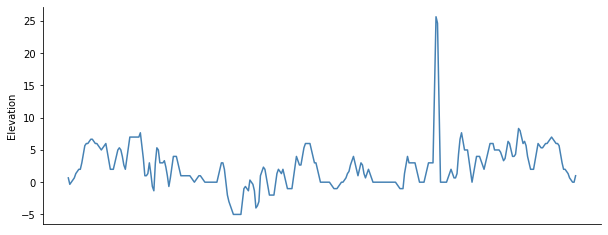

In [34]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = pd.Series(elevation).rolling(3).mean().plot(
    ax=ax, 
    color='steelblue', 
    legend=False
)
ax.set_ylabel('Elevation')
ax.axes.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [28]:
import folium
centroid = [
    np.mean([coord[0] for coord in decoded_0]), 
    np.mean([coord[1] for coord in decoded_0])
]
my_map = folium.Map(location=centroid, zoom_start=13)
folium.PolyLine(decoded_0).add_to(my_map)
my_map

In [ ]:
map_df['decoded'] = map_df['summary_polyline'].apply(lambda x: polyline.decode(x))

In [ ]:
import ast
result = ast.literal_eval(map_dict)
result['id']

In [ ]:
# Converting dictionaly map column to datetime
type(map_dict)


In [ ]:
import polyline

# add decoded summary polylines
rides['poly'] = rides['map'].apply(lambda x: polyline.decode(x))

In [ ]:
# get elevation data
elevation_data = list()
for idx in tqdm(activities.index):
    activity = activities.loc[idx, :]
    elevation = [get_elevation(coord[0], coord[1]) for coord in activity['map.polyline']]
    elevation_data.append(elevation)